## The Sparks Foundation

# TASK-5: Traffic sign classification/Recognition system

**Author: Gosu Praneeth**

GRIP JULY 21 (Computer Vision & IoT)

## Traffic Sign Recognition System

Moving to the dataset directory in drive <br>
If dataset available locally in the same directory ignore the below command

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Datafiles/Traffic_sign_Recognition_system

/content/drive/MyDrive/Colab Notebooks/Datafiles/Traffic_sign_Recognition_system


## Importing the required libraries

In [ ]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [ ]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

In [ ]:
directory = "gtsrb"
filename = 'model.h5'

## Load Data

In [ ]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.
    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.
    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    data=[]
    label=[]

    # reading each directory
    for i in range(43):
    	sub_dir=[x[2] for x in os.walk(os.path.join(data_dir,"",str(i),""))]

        # reading each photo
    	for file in sub_dir[0]:
      		img=cv2.imread(os.path.join(data_dir,"",str(i),"",file))
      		try:

                # resizing the photo
	        	len(img)
        		img=cv2.resize(img,(30,30))
        		data.append(img)
        		label.append(i)

      		except TypeError:
		        pass
    return data,label

## Creating Model 

In [ ]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        32,(3, 3), activation='softmax', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)
    ),

    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten units
    tf.keras.layers.Flatten(),


    # Add a hidden layer with dropout
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.33),

    # Add a NUM_CATEGORIES layer
    tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")])


    # compiler
    model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
    return (model)

## Loading and splitting the data

In [ ]:
# Get image arrays and labels for all image files
images, labels = load_data(directory)

# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

## Train and Save Model

In [ ]:
# Get a compiled neural network
model = get_model()

# Fit model on training data
model.fit(x_train, y_train, epochs=EPOCHS)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

# Save model to file
model.save(filename)
print(f"Model saved to {filename}.")

Epoch 1/10
501/501 [==============================] - 33s 3ms/step - loss: 1.7549 - accuracy: 0.5117
Epoch 2/10
501/501 [==============================] - 2s 3ms/step - loss: 0.5183 - accuracy: 0.8425
Epoch 3/10
501/501 [==============================] - 2s 3ms/step - loss: 0.2992 - accuracy: 0.9093
Epoch 4/10
501/501 [==============================] - 2s 3ms/step - loss: 0.2166 - accuracy: 0.9347
Epoch 5/10
501/501 [==============================] - 2s 3ms/step - loss: 0.1709 - accuracy: 0.9490
Epoch 6/10
501/501 [==============================] - 2s 3ms/step - loss: 0.1324 - accuracy: 0.9598
Epoch 7/10
501/501 [==============================] - 2s 3ms/step - loss: 0.1140 - accuracy: 0.9627
Epoch 8/10
501/501 [==============================] - 2s 3ms/step - loss: 0.1033 - accuracy: 0.9698
Epoch 9/10
501/501 [==============================] - 2s 3ms/step - loss: 0.0994 - accuracy: 0.9671
Epoch 10/10
501/501 [==============================] - 2s 3ms/step - loss: 0.1086 - accuracy: 0.966

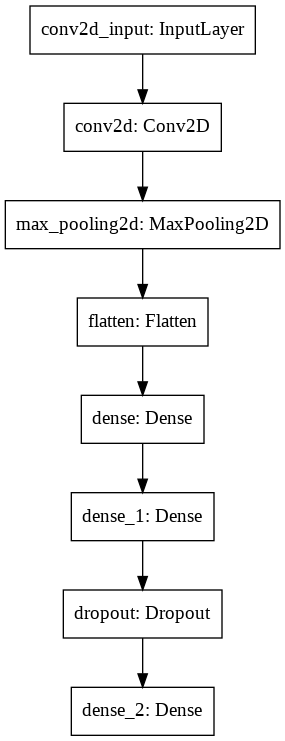

In [ ]:
# Model structure
tf.keras.utils.plot_model(model)

## Reloading the model

In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
model = load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)                2

## Images and respective labels

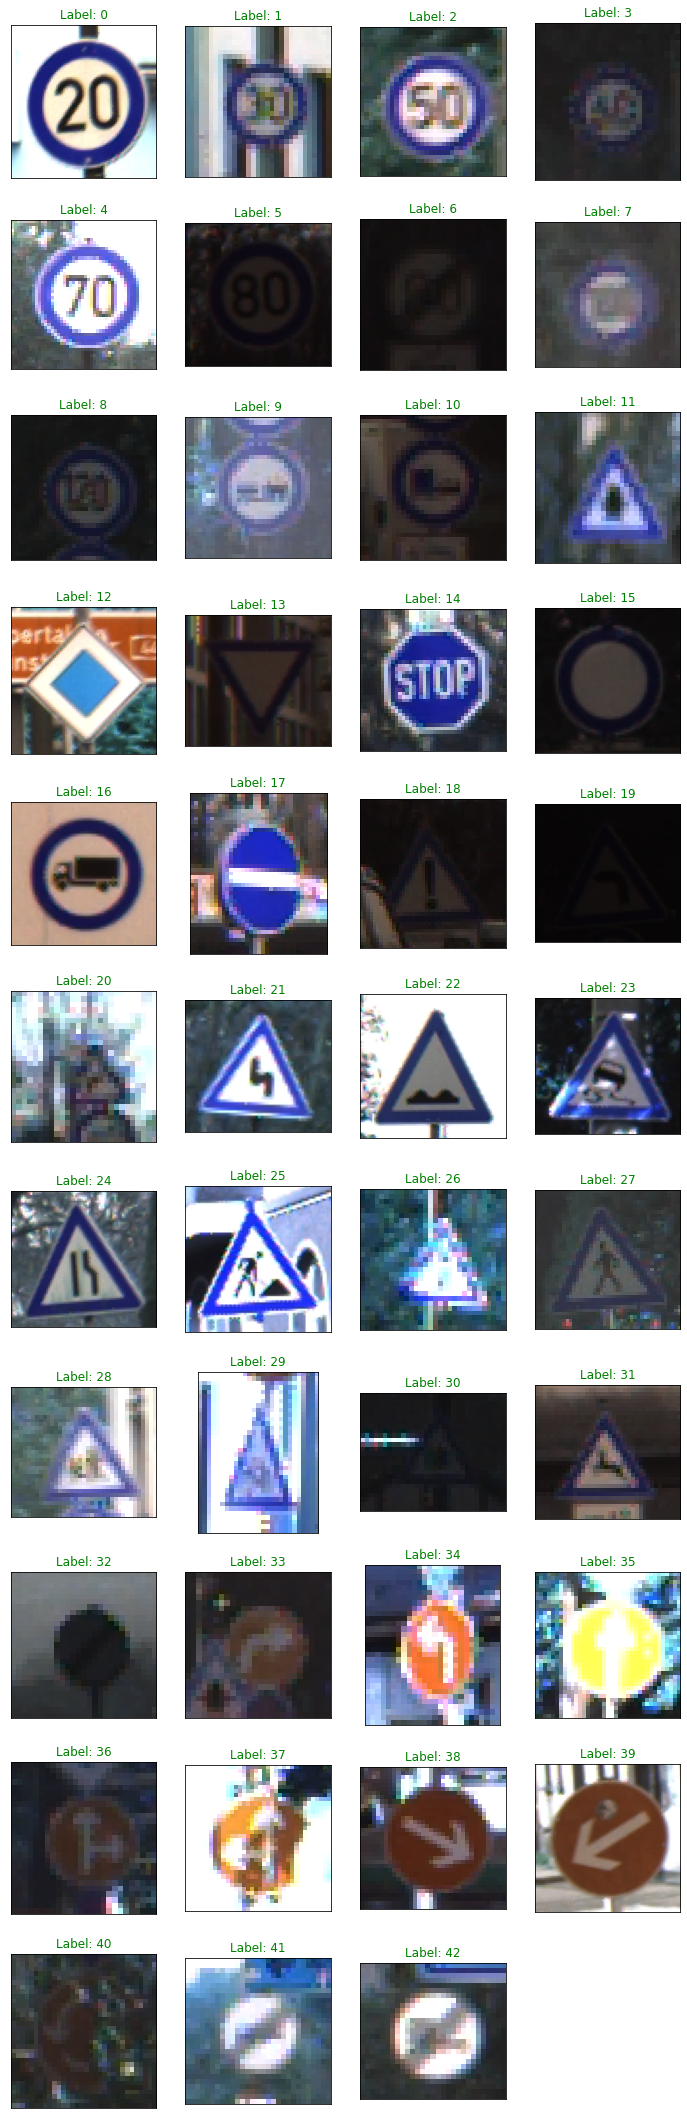

In [ ]:
data_dir = "gtsrb"
plt.figure(figsize = (12,42))

for i in range(43):
  sub_dir=[x[2] for x in os.walk(os.path.join(data_dir,"",str(i),""))]
  img=cv2.imread(os.path.join(data_dir,"",str(i),"",sub_dir[0][0]))
  try:
    len(img)
    #img=cv2.resize(img,(30,30))
    plt.subplot(12,4,(i+1))
    plt.imshow(img)
    plt.title(f'Label: {i}', color='green',fontdict={'fontsize': 12})
    plt.xticks([])
    plt.yticks([])
  except TypeError:
    pass
plt.show()

## Predicting and Ploting the result

In [ ]:
def gen_random_image():
  i = np.random.randint(0,42)
  sub_dir=[x[2] for x in os.walk(os.path.join(data_dir,"",str(i),""))]
  j = np.random.randint(0,len(sub_dir))
  img=cv2.imread(os.path.join(data_dir,"",str(i),"",sub_dir[0][j]))
  img=cv2.resize(img,(30,30))
  return img,i

In [ ]:
def pred_image(model,img):
  img_ = [img]
  pred = model.predict(np.array(img_))
  return np.argmax(pred)

In [ ]:
def plot_pred_image(img,label,pred_label):
  col = 'green' if label == pred_label else 'red'
  plt.imshow(img)
  plt.xlabel(f'Label: {label}', color=col)
  plt.ylabel(f'Pred-Label: {pred_label}', color=col)
  plt.xticks([])
  plt.yticks([])

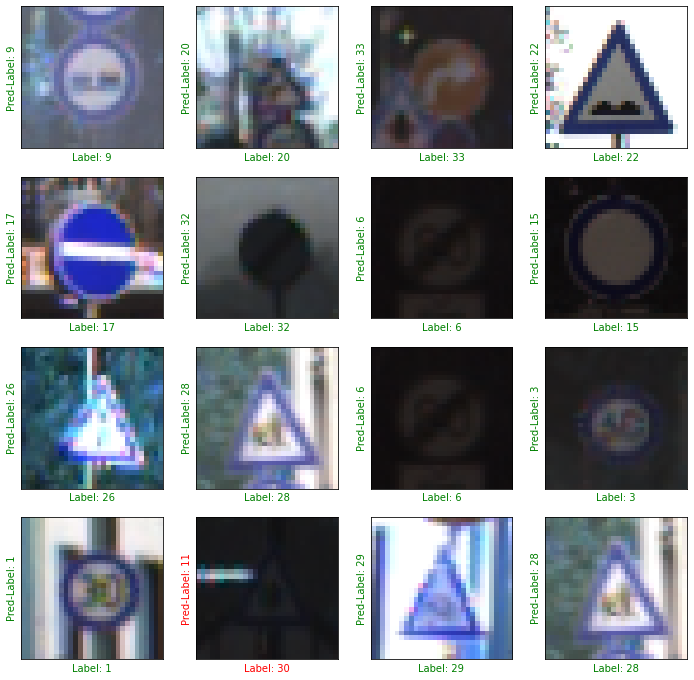

In [ ]:
plt.figure(figsize=(12,12))
for i in range(16):
  plt.subplot(4,4,i+1)
  img, label = gen_random_image()
  pred_label = pred_image(model,img)
  plot_pred_image(img,label,pred_label)

plt.show()